# Tarea 2
## Fundamentos Matemáticos para la Inteligencia Artificial
### IMT3850 2023
__Alumno: Sebastián Valenzuela T.__

##Pregunta 1 - Variables Aleatorias

Para calcular la media de Z, primero calculamos la media de cada componente:

E[x] = 0, E[y] = 0

E[ax + by] = aE[x] + bE[y] = 0

Por lo tanto, la **media de Z** es:

**E[Z]** = (E[x], E[y], E[ax+by]) = **(0, 0, 0)**

Dado que x e y son variables aleatorias independientes con media 0 y varianza 1, podemos calcular la matriz de covarianza de Z = (x, y, ax + by) de la siguiente manera:

La matriz de covarianza se define como:

Cov(Z) = E[(Z - E[Z])(Z - E[Z])^T]

Donde E[Z] es el vector de medias de Z. En este caso, E[Z] = (0, 0, 0).

Entonces, para calcular Cov(Z), necesitamos calcular la matriz de covarianza para cada par de componentes de Z y sus combinaciones.

Cov(x, x):
Cov(x, x) = E[(x - E[x])(x - E[x])] = E[x^2] - E[x]^2 = Var(x) = 1

Cov(y, y):
Cov(y, y) = E[(y - E[y])(y - E[y])] = E[y^2] - E[y]^2 = Var(y) = 1

Cov(ax + by, ax + by):
Cov(ax + by, ax + by) = E[(ax + by - E[ax + by])(ax + by - E[ax + by])]

= E[(ax + by - aE[x] - bE[y])(ax + by - aE[x] - bE[y])]

= E[(ax - aE[x])^2 + 2(ax - aE[x])(by - bE[y]) + (by - bE[y])^2]

= E[(ax - aE[x])^2] + 2E[(ax - aE[x])(by - bE[y])] + E[(by - bE[y])^2]

= a^2E[(x - E[x])^2] + 2abE[(x - E[x])(y - E[y])] + b^2E[(y - E[y])^2]

= a^2Cov(x, x) + 2abCov(x, y) + b^2Cov(y, y)

= a^2 + b^2

Cov(x, ax + by):
Cov(x, ax + by) = E[(x - E[x])(ax + by - E[ax + by])]

= E[(x - E[x])(ax - aE[x] + by - bE[y])]

= E[(x - E[x])(ax - aE[x])] + E[(x - E[x])(by - bE[y])]

= aE[(x - E[x])^2] + bE[(x - E[x])(y - E[y])]

= aCov(x, x) + bCov(x, y)

= a

Cov(y, ax + by):
Cov(y, ax + by) = E[(y - E[y])(ax + by - E[ax + by])]

= E[(y - E[y])(ax - aE[x] + by - bE[y])]

= E[(y - E[y])(ax - aE[x])] + E[(y - E[y])(by - bE[y])]

= aE[(y - E[y])(x - E[x])] + bE[(y - E[y])^2]

= aE[(y - E[y])(x - E[x])] + bCov(y, y)

= b

Luego, **la matriz de covarianza Cov(Z)** queda:

Cov(Z) =
\begin{equation}
    \begin{Vmatrix}
 Cov(x, x) & Cov(x, y) & Cov(x, ax + by) \\
 Cov(y, x) & Cov(y, y) & Cov(y, ax + by) \\
 Cov(ax + by, x) & Cov(ax + by, y) & Cov(ax + by, ax + by) 
    \end{Vmatrix}
\end{equation}


Sustituyendo los valores calculados:

**Cov(Z)** =
\begin{equation}
    \begin{Vmatrix}
 1 & 0 & a \\
 0 & 1 & b\\
 a & b & a^2 + b^2 
    \end{Vmatrix}
\end{equation}

Por lo tanto, esa es la matriz de covarianza Cov(Z) de las variables aleatorias Z = (x, y, ax + by), donde a y b son números reales.

##Pregunta 2 - Algoritmo Random Quicksort



a) Algoritmo y lista S

In [27]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import math

In [46]:
def Quicksort_count_comparison(Sinput):
    S = Sinput.copy()
    if len(S) == 1 or not S:
        return S, 0
    else:
        # choose pivot
        ix = np.random.choice(range(0, len(S)))
        x = S[ix]
        S1 = []
        S2 = []
        S.remove(x)
        for item in S:
            if item<x:
                S1.append(item)
            else:
                S2.append(item)
        count = len(S)
        S1, count1 = Quicksort_count_comparison(S1)
        S2, count2 = Quicksort_count_comparison(S2)
        count += count1+count2
        return S1+[x]+S2, count

In [47]:
# Ejemplo
S=[0,5,4,1,7,6,3,2,8,9]
S_sorted, count_comparisons = Quicksort_count_comparison(S)
print("lista S:",S)
print("lista S ordenada:",S_sorted)
print("Número de comparaciones:",count_comparisons)

lista S: [0, 5, 4, 1, 7, 6, 3, 2, 8, 9]
lista S ordenada: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Número de comparaciones: 23


b) Largo de lista n fijo

In [37]:
for i in range(0,10):
    n = 100  # Longitud de la lista fija
    N = 100  # Número de iteraciones para calcular el promedio
    cc = 0  # Contador de comparaciones

    for _ in range(N):
        S = np.random.rand(n).tolist()  # Genera una lista aleatoria de longitud n
        _, count_comparisons = Quicksort_count_comparison(S)  # Ordena la lista y obtiene el número de comparaciones
        cc += count_comparisons

    average_comparisons = cc / N  # Calcula el promedio de comparaciones

    print("Promedio de comparaciones:", average_comparisons)

Promedio de comparaciones: 651.54
Promedio de comparaciones: 655.93
Promedio de comparaciones: 644.2
Promedio de comparaciones: 636.5
Promedio de comparaciones: 652.03
Promedio de comparaciones: 647.84
Promedio de comparaciones: 660.28
Promedio de comparaciones: 651.11
Promedio de comparaciones: 636.56
Promedio de comparaciones: 648.69


c) Procedimiento para n de 100 a 5000

In [49]:
n = [100,200,300,400,500,600,700,800,900,1000,1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000]
cc = []
N = 100
for ni in n:
    cc_i =0
    for j in range(N):
        S = np.random.rand(ni).tolist()
        Ssorted, count_comparisons_j = Quicksort_count_comparison(S)
        cc_i += count_comparisons_j
    cc.append(cc_i/N)

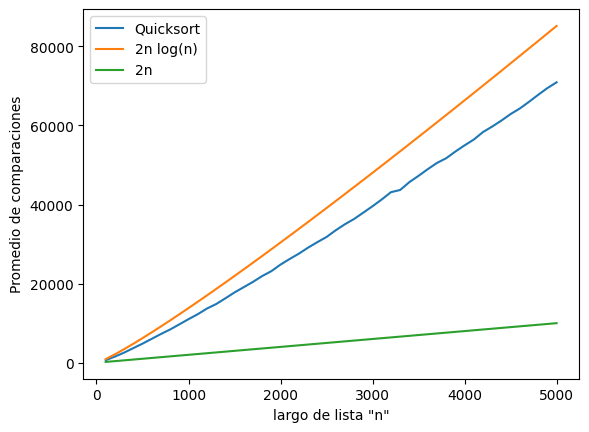

In [50]:
plt.plot(n, cc, label='Quicksort')
plt.plot(n, 2*np.asarray(n)*np.log(np.asarray(n)), 'C01', label='2n log(n)')
plt.plot(n, 2*np.asarray(n), 'C02', label='2n')
plt.xlabel('largo de lista "n"')
plt.ylabel('Promedio de comparaciones')
plt.legend()
plt.show()

d) Los resultados del experimento corroboran los resultados teóricos porque el promedio de comparaciones observado se acerca a la función teórica 2nlog(n). Además, la curva del promedio de comparaciones se encuentra por encima de la curva 2n, lo cual también es consistente con la teoría. Esto muestra que el número esperado de comparaciones realizado por el algoritmo Quicksort aleatorio se ajusta a la complejidad esperada de 2nln(n) + O(n)


##Pregunta 3 - Convexidad

Sea $f : R^d → R$ una función diferenciable. Pruebe que $f$ es una función convexa si y sólo si se satisface:



*   $(Eq. 1.0):$  $f(y) ≥ f(x) + \textit{∇f(x)}^T (y - x)$



para todo $x, y$ en el dominio de $f$.

**Demostración (pág. 70, libro "Convex Optimization", S. Boyd)**:

Para demostrar $(1.0)$, primero consideramos el caso $n = 1$: 

Demostramos que una función diferenciable $f : R → R$ es convexa si y sólo si

*   $(Eq. 1.1)$: $f(y) ≥ f(x) + f'(x)(y - x)$

para todo $x$ e $y$ en $dom f$.


Supongamos primero que $f$ es convexa y $x, y ∈ dom f$. 

Puesto que $dom f$ es convexo (es decir, un intervalo), concluimos que para todo $0 < t ≤ 1, x + t(y - x) ∈ dom f$, 

y por convexidad de $f$,

$f(x + t(y - x)) ≤ (1 - t)f(x) + tf(y)$

Si dividimos ambos lados por t, obtenemos:

$ f(y) ≥ f(x) + \dfrac{f(x + t(y - x)) - f(x) }{t}$

y tomando el límite cuando $t → 0$ se obtiene $(1.1)$.

Para demostrar la suficiencia, supongamos que la función satisface $(1.1)$ para todo $x$ e $y$ en $dom f$ (que es un intervalo). Escojamos cualquier $x \neq y$, cualquier $0 ≤ θ ≤ 1$, y dejemos $z = θx+ (1 - θ)y$. Aplicando (1.1) dos veces se obtiene:

$f(x) ≥ f(z) + f'(z)(x - z)$

$f(y) ≥ f(z) + f'(z)(y - z)$

Multiplicando la primera desigualdad por $θ$, la segunda por $(1 - θ)$, y sumándolas se obtiene:

$θf(x) + (1 - θ)f(y) ≥ f(z)$

lo que demuestra que $f$ es convexa.

Ahora podemos demostrar el caso general, con $f : R^n → R$. Sean $x, y ∈ R^n$
y consideremos $f$ restringida a la recta que pasa por ellas, es decir, la función definida por $g(t) = f(ty + (1 - t)x)$, por lo que $g'(t) = ∇f(ty + \textit{(1 - t)x)}^T (y - x)$.
Primero supongamos que $f$ es convexa, lo que implica que $g$ es convexa, así que por el argumento anterior tenemos que $g(1) ≥ g(0) + g'(0)$, lo que significa:

$f(y) ≥ f(x) + \textit{∇f(x)}^T (y - x)$

Supongamos ahora que esta desigualdad se cumple para cualquier $x$ e $y$, de modo que si $ty + (1 - t)x ∈ dom f$ y $ty˜ + (1 - t˜)x ∈ dom f$, tenemos entonces:


$f(ty + (1 - t)x) ≥ f(ty˜ + (1 - t˜)x) + \textit{∇f(ty˜ + (1 - t˜)x)}^T (y - x)(t - t˜)$,
es decir, $g(t) ≥ g(t˜) + g'(t˜)(t - t˜)$. Hemos visto que esto implica que $g$ es convexa

##Pregunta 4 - Descenso del Gradiente

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
SEED=777

In [3]:
!gdown 1NdFOLI4VMnxC_PIJ-fux3PpUl2rZF6aD
!gdown 1edPTs4U6pvzBGHYdfxOOyTKX4YnXTFO7

Downloading...
From: https://drive.google.com/uc?id=1NdFOLI4VMnxC_PIJ-fux3PpUl2rZF6aD
To: /content/datos_lineales.csv
100% 10.2k/10.2k [00:00<00:00, 28.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1edPTs4U6pvzBGHYdfxOOyTKX4YnXTFO7
To: /content/datos_cuadraticos.csv
100% 10.6k/10.6k [00:00<00:00, 28.8MB/s]


In [4]:
datos_lineales=pd.read_csv('datos_lineales.csv')
datos_lineales.describe()

,Unnamed: 0,x,y
count,250.000000,250.000000,250.000000
mean,124.500000,1.040321,4.055043
std,72.312977,0.579731,1.784490
min,0.000000,0.006474,-0.215672
25%,62.250000,0.573036,2.637368
50%,124.500000,1.057243,4.063406
75%,186.750000,1.561661,5.571885
max,249.000000,1.983961,7.647386


In [5]:
datos_lineales

,Unnamed: 0,x,y
0,0,1.103572,4.270829
1,1,0.781133,3.855470
2,2,1.467428,5.839489
3,3,1.786026,6.402536
4,4,0.719095,4.026357
...,...,...,...
245,245,0.666660,2.022880
246,246,0.840565,3.777644
247,247,0.500192,3.231720
248,248,0.568545,2.525043


In [6]:
datos_cuadraticos=pd.read_csv('datos_cuadraticos.csv')
datos_cuadraticos.describe()

,Unnamed: 0,x,y
count,250.000000,250.000000,250.000000
mean,124.500000,1.032165,0.341762
std,72.312977,0.587562,0.293497
min,0.000000,0.030849,-0.175243
25%,62.250000,0.463446,0.099320
50%,124.500000,1.046672,0.293497
75%,186.750000,1.583540,0.549769
max,249.000000,1.988814,1.052897


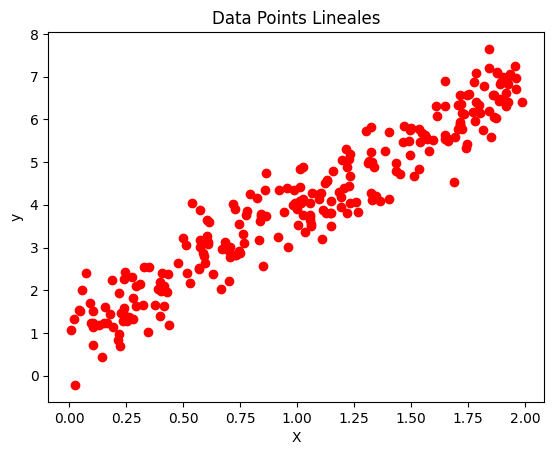

In [68]:
X = datos_lineales['x']
y = datos_lineales['y']

# Plotting the data points
plt.scatter(X, y, color='red')

# Labeling the plot
plt.xlabel('X')
plt.ylabel('y')
plt.title('Data Points Lineales')

# Display the plot
plt.show()


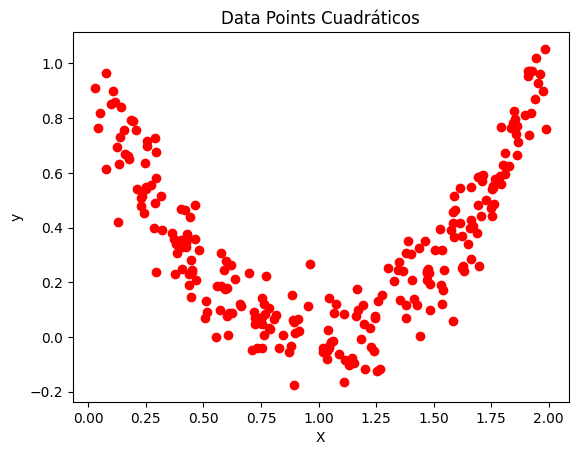

In [69]:
X2 = datos_cuadraticos['x']
y2 = datos_cuadraticos['y']

# Plotting the data points
plt.scatter(X2, y2, color='red')

# Labeling the plot
plt.xlabel('X')
plt.ylabel('y')
plt.title('Data Points Cuadráticos')

# Display the plot
plt.show()

In [70]:
np.random.seed(SEED)
N=250
D=2
theta=np.random.randn(D)
theta
theta

array([-0.46820879, -0.82282485])

In [71]:
def linear_regression(X, y, learning_rate=0.01, num_iterations=1000):
    # Add a column of ones to X for the intercept term
    X = np.column_stack((np.ones(len(X)), X))
    
    # Initialize theta with zeros
    #D=2
    #theta=np.random.randn(D)
    theta = np.zeros(X.shape[1])
    
    N = len(y)
    
    for _ in range(num_iterations):
        # Calculate the predicted values
        predictions = np.dot(X, theta)
        
        # Calculate the errors
        errors = predictions - y
        
        # Calculate the gradients
        gradients = np.dot(X.T, errors) / N
        
        # Update theta using gradient descent
        theta -= learning_rate * gradients
    
    return theta

# Example usage
X = datos_lineales['x']
y = datos_lineales['y']

theta = linear_regression(X, y)
print("Theta:", theta)


Theta: [1.18352636 2.7878872 ]


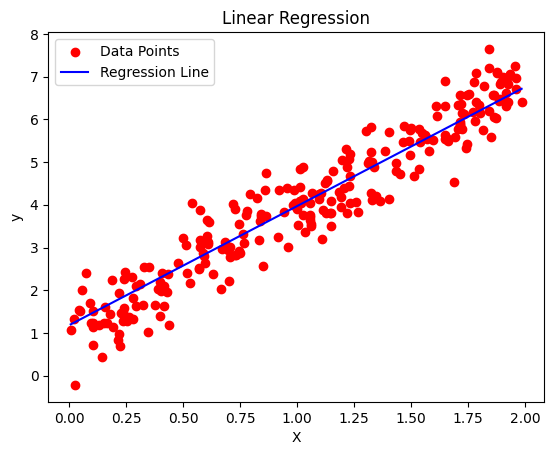

In [72]:
# Plotting the data points
plt.scatter(X, y, color='red', label='Data Points')

# Adding the regression line
x_values = np.linspace(X.min(), X.max(), 100)
y_values = theta[0] + theta[1] * x_values
plt.plot(x_values, y_values, color='blue', label='Regression Line')

# Labeling the plot
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()

# Display the plot
plt.show()

In [73]:
def loss_ls(theta,x,y):
    N = x.size
    X = np.zeros((N,2), dtype=np.float64)
    X[:,0] = np.ones(N)
    X[:,1] = x[:]
    return (1.0/N)*np.linalg.norm(X.dot(theta)-y)**2

def gradloss_ls(theta,x,y):
    N = x.size
    X = np.zeros((N,2), dtype=np.float64)
    X[:,0] = np.ones(N)
    X[:,1] = x[:]
    return (2.0/N)*X.T.dot(X.dot(theta)-y)

In [74]:
theta = np.array([0, 0])  # Ejemplo de valores para theta
loss = loss_ls(theta, datos_lineales["x"], datos_lineales["y"])
gradient = gradloss_ls(theta, datos_lineales["x"], datos_lineales["y"])


In [75]:
theta

array([0, 0])

In [65]:
loss

19.61504067034816

In [76]:
MAXITER = 1000
TOL = 1e-6
def graddescent_iter(f, gradf, x0):
    iter = 0
    xi = x0.copy()
    gamma_i = 0.01
    error = 1.
    while error>TOL and iter<MAXITER:
        xnew = xi- gamma_i*gradf(xi)
        error = np.linalg.norm(xnew-xi)
        print(error)
        xi = xnew
        iter += 1
    return xi, iter


def graddescent_iter_stepsize(f, gradf, x0, MAXITER = 1000, TOL = 1e-6):
    iter = 0
    xi = x0.copy()
    gamma_i = 1
    error = 1.
    while error>TOL and iter<MAXITER:
        xnew = xi- gamma_i*gradf(xi)
        if f(xnew)>f(xi):
            # decrease step size
            gamma_i = gamma_i/2
        else:
            error = np.linalg.norm(xnew-xi)
            print(error, gamma_i)
            xi = xnew
            gamma_i = gamma_i*2
            iter += 1
    return xi, iter


In [77]:
f2 = lambda theta: loss_ls(theta,X,y)
df2 = lambda theta: gradloss_ls(theta,X,y)
theta0 = np.array([1,1], dtype=np.float64)
thetastar, niter = graddescent_iter_stepsize(f2, df2, theta0, MAXITER = 200000)
print(thetastar, niter)

1.7037051270362276 0.25
0.24448714466413546 0.25
0.16905878552346973 0.5
0.3108049256634021 1.0
0.14663744227210654 0.25
0.09525700597633543 0.5
0.17700842084119353 1.0
0.08806528183711691 0.25
0.05377185390485671 0.5
0.10110074834196642 1.0
0.05294967719049711 0.25
0.030416324602853036 0.5
0.057923339940492855 1.0
0.031868051707870944 0.25
0.017244470958927883 0.5
0.033293862625525666 1.0
0.019196550168796362 0.25
0.009801282484025467 0.5
0.00960093402459857 0.5
0.010150401492910952 0.5
0.011530920809248982 0.5
0.006896433112966677 0.25
0.004476709054471282 0.5
0.008319805591051919 1.0
0.004141814516000822 0.25
0.00252712598926544 0.5
0.004752136199692076 1.0
0.0024903173351088375 0.25
0.0014295182186138376 0.5
0.0027227282141995333 1.0
0.0014988273988023144 0.25
0.0008104851645003643 0.5
0.0015650630357898316 1.0
0.0009028661925006824 0.25
0.00046067164857762705 0.5
0.0004513346353124541 0.5
0.00047725668628205295 0.5
0.0005422513861206339 0.5
0.000324342797811264 0.25
0.000210387979

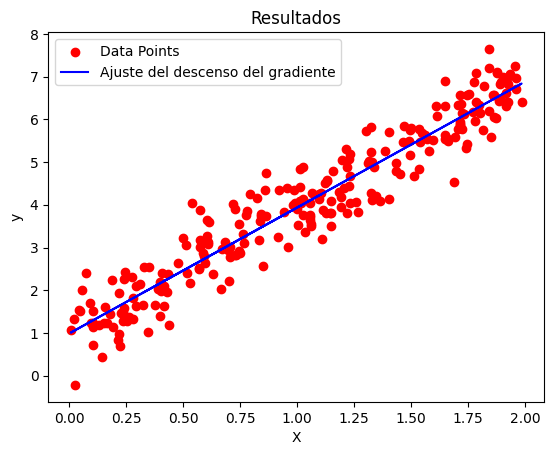

In [79]:
# Plotting the data points
plt.scatter(X, y, color='red', label='Data Points')

# Adding the regression line
x_values = X
y_values = thetastar[0] + thetastar[1] * x_values
plt.plot(x_values, y_values, color='blue', label='Ajuste del descenso del gradiente')

# Labeling the plot
plt.xlabel('X')
plt.ylabel('y')
plt.title('Resultados')
plt.legend()

# Display the plot
plt.show()

In [97]:
a=np.zeros((X.size, datos_lineales.shape[1]))

In [102]:
import pandas as pd

def generate_mini_batch(data, batch_size):
    mini_batch = data.sample(n=batch_size)
    return mini_batch

# Ejemplo de uso
data = datos_cuadraticos
batch_size = 1
mini_batch = generate_mini_batch(data, batch_size)
print(mini_batch)


   Unnamed: 0         x        y
0           0  0.805126  0.06715


In [103]:
import numpy as np

def stochastic_gradient_descent(X, y, learning_rate=0.01, num_epochs=100):
    num_samples, num_features = X.shape
    weights = np.zeros(num_features)  # Inicializar los pesos a cero

    for epoch in range(num_epochs):
        for i in range(num_samples):
            random_index = np.random.randint(num_samples)  # Seleccionar un ejemplo de forma aleatoria
            xi = X[random_index]
            yi = y[random_index]
            gradient = 2 * xi * (np.dot(xi, weights) - yi)  # Calcular el gradiente
            weights = weights - learning_rate * gradient  # Actualizar los pesos usando el gradiente descendente

    return weights

# Ejemplo de uso
# Supongamos que tenemos un conjunto de datos con una característica (X) y una variable objetivo (y)
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 6, 8, 10])

# Aplicar el algoritmo de gradiente descendente estocástico
weights = stochastic_gradient_descent(X, y, learning_rate=0.1, num_epochs=1000)

print("Pesos finales:", weights)


Pesos finales: [3.91383858e+27]


##Pregunta 5- Algoritmo de mediana aleatoria

In [52]:
def Quicksort(Sinput):
    S = Sinput.copy()
    if len(S) == 1 or not S:
        return S
    else:
        # choose pivot
        ix = np.random.choice(range(0, len(S)))
        x = S[ix]
        S1 = []
        S2 = []
        S.remove(x)
        for item in S:
            if item<x:
                S1.append(item)
            else:
                S2.append(item)
        S1 = Quicksort(S1)
        S2 = Quicksort(S2)
        
        return S1+[x]+S2

In [53]:
#Aquí tenemos el algoritmo requerido de mediana aleatoria
def RandomizedMedianAlgorithm(Sinput):
    S = Sinput.copy()
    n = len(S)
    n34 = n**(3/4)
    n12 = np.sqrt(n)
    print(n, n34, n12)
    n1 = int(np.ceil(n34))

    R = sample(S, n1)
    print("len(R):", len(R))
    R = Quicksort(R)
    #print(R)
    di = int(np.floor(0.5*n34-n12))
    ui = int(np.ceil(0.5*n34+n12)-1)
    print("di:", di, "ui:", ui)
    d = R[di]
    u = R[ui]
    print("d:", d, "u:",u)
    C = []
    elld = 0
    ellu = 0
    for x in S:
        if x<d:
            elld += 1
        elif x>u:
            ellu += 1
        else:
            C.append(x)
    print("elld:", elld)
    print("ellu:", ellu)
    print("|C|: ", len(C), 4*n34)
    if elld>n/2 or ellu>n/2:
        return False
    if len(C) <= 4*n34:
        C = Quicksort(C)
        m = int(np.floor(n/2)) - elld   # or -1 in python
        return C[m]
    else:
        return False

**Ejemplo de experimento 1**: Hagamos una secuencia aleatoria de 21 números, luego ordenaremos utilizando internamente con el algoritmo con la función Quicksort, y a partir de ello imprimir el valor en la posición central de la secuencia ordenada (la mediana). Luego, comparar el resultado con el que da el algoritmo al iterar y ver si llega a la misma respuesta.

In [65]:
#Prueba con Quicksort y valor central de la lista
from random import sample
NS = 21
SS = np.random.rand(NS).tolist()

print("largo de lista: ",len(SS))
Ssorted = Quicksort(SS)
print(Ssorted)
print("mediana: ",Ssorted[int((NS-1)/2)])

largo de lista:  21
[0.006526908225679695, 0.0849198673775522, 0.127703448022781, 0.1631639213983287, 0.4071819253524336, 0.40874806416142917, 0.41536875565551734, 0.5320187361871082, 0.536878617935155, 0.5581541000400511, 0.6117521752477615, 0.6209020078678983, 0.6340207073120284, 0.6577464887446286, 0.6940777651523118, 0.7010071180654716, 0.8140891089043304, 0.8678522728328297, 0.9368100341783762, 0.9813414930661035, 0.9950769752587174]
mediana:  0.6117521752477615


In [67]:
#Prueba con algoritmo de mediana aleatoria
answer2 = True
iter = 0
while answer2 is not False and iter<1000:
    
    answer2 = RandomizedMedianAlgorithm(SS)
    print("*** iter:", iter, ", answer:", answer2)
    iter += 1

Se han truncado las últimas 5000 líneas del flujo de salida.
21 9.809897532292203 4.58257569495584
len(R): 10
di: 0 ui: 9
d: 0.006526908225679695 u: 0.9368100341783762
elld: 0
ellu: 2
|C|:  19 39.23959012916881
*** iter: 375 , answer: 0.6117521752477615
21 9.809897532292203 4.58257569495584
len(R): 10
di: 0 ui: 9
d: 0.006526908225679695 u: 0.9813414930661035
elld: 0
ellu: 1
|C|:  20 39.23959012916881
*** iter: 376 , answer: 0.6117521752477615
21 9.809897532292203 4.58257569495584
len(R): 10
di: 0 ui: 9
d: 0.006526908225679695 u: 0.9813414930661035
elld: 0
ellu: 1
|C|:  20 39.23959012916881
*** iter: 377 , answer: 0.6117521752477615
21 9.809897532292203 4.58257569495584
len(R): 10
di: 0 ui: 9
d: 0.0849198673775522 u: 0.6577464887446286
elld: 1
ellu: 7
|C|:  13 39.23959012916881
*** iter: 378 , answer: 0.6117521752477615
21 9.809897532292203 4.58257569495584
len(R): 10
di: 0 ui: 9
d: 0.0849198673775522 u: 0.9813414930661035
elld: 1
ellu: 1
|C|:  19 39.23959012916881
*** iter: 379 , answe

Se puede observar claramente de que el algoritmo funciona y nos entrega la mediana de la lista, pues el valor coincide al que obtuvimos al ordenar la lista y extraer el valor central.

**Otro ejemplo de experimento**, obtendremos la mediana de una lista ordenada de números del 0 al 200:

In [63]:
answer = True
iter = 0
NS = 201
#S = np.random.rand(NS).tolist()
S = np.arange(NS).tolist()
print(S)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200]


In [64]:
while answer is not False and iter<1000:
    
    answer = RandomizedMedianAlgorithm(S)
    print("*** iter:", iter, ", answer:", answer)
    iter += 1

Se han truncado las últimas 5000 líneas del flujo de salida.
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 35 u: 156
elld: 35
ellu: 44
|C|:  122 213.52908270791866
*** iter: 375 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 33 u: 145
elld: 33
ellu: 55
|C|:  113 213.52908270791866
*** iter: 376 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 34 u: 152
elld: 34
ellu: 48
|C|:  119 213.52908270791866
*** iter: 377 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 28 u: 149
elld: 28
ellu: 51
|C|:  122 213.52908270791866
*** iter: 378 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 50 u: 169
elld: 50
ellu: 31
|C|:  120 213.52908270791866
*** iter: 379 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 55 u: 146
elld: 55
ellu: 54
|C|:  92 213.52908270791866
*** iter: 380 , answer: 100
201 53.382

Se comprueba con este experimento el algoritmo funciona, ya que la lista ordenada de números del 0 al 200 tiene como mediana al 100, y el algoritmo encuentra la solución exacta, de 100, en la iteración 199.